In [ ]:
%config InlineBackend.figure_format = "svg"

from src.networks.nodes import StateNode, ActionNode, UtilityNode, EvidenceNode
from src.trees.nodes import TreeBeliefNode, TreeObservationNode, Tree
from src.networks.dn import DecisionNetwork

# Decision Networks

## Creating the decision network structure

In [ ]:
# Create the nodes for the network
rain = StateNode("Rain", value_range=(0, 1))
umbrella = ActionNode("Umbrella", value_range=(0, 1))
utility = UtilityNode("Utility", value_range=(0, 1))

# Create the network structure
dn = DecisionNetwork()
dn.add_nodes([rain, umbrella, utility])
dn.add_edges([("Rain", "Utility"), ("Umbrella", "Utility")])
dn.draw()

## Populate the Decision Network with data

In [ ]:
# Add data for node Rain
data = {"Rain": [0,1], "Prob": [0.8, 0.2]}
dn.add_pt("Rain", data)

# Add data for node utility
data = {"Rain": [0,0,0,0,1,1,1,1], "Umbrella": [0,0,1,1,0,0,1,1], "Utility": [0,1,0,1,0,1,0,1], "Prob":[0,1,1,0,1,0,0,1]}
dn.add_pt("Utility", data)

## Classical query for the best decision

In [ ]:
# Initialize dn
dn.initialize()

In [ ]:
dn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100)

## Quantum-Classical query for the best decision

In [ ]:
dn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100, quantum=True)

# Creating a dynamic decision network

In [1]:
%config InlineBackend.figure_format = "svg"

from src.networks.nodes import StateNode, ActionNode, UtilityNode, EvidenceNode
from src.networks.dn import DecisionNetwork
from src.trees.tree import Tree

## Example: Tiger problem

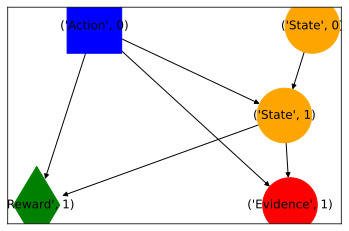

In [2]:
# Create nodes
s0 = StateNode(("State", 0), value_space=[0,1])
s1 = StateNode(("State", 1), value_space=[0,1])
o1 = EvidenceNode(("Evidence", 1), value_space=[0,2])
r1 = UtilityNode(("Reward", 1), value_space=[-100,-1,10])
a0 = ActionNode(("Action", 0), value_space=[0,1,2])

# Create the initial DDN structure
ddn = DecisionNetwork()
ddn.add_nodes([s0, s1, o1, r1, a0])
ddn.add_edges([
    (("State", 0), ("State", 1)), 
    (("Action", 0), ("State", 1)), 
    (("Action", 0), ("Reward", 1)),
    (("Action", 0), ("Evidence", 1)),
    (("State", 1), ("Evidence", 1)), 
    (("State", 1), ("Reward", 1))
])
ddn.draw()

In [3]:
# Add data for node State 0
data = {
    ("State", 0): [0,1], 
    "Prob": [0.5,0.5]
}
ddn.add_pt(("State", 0), data)

# Add data for node State 1
data = {
    ("State", 0): [0,0,0,0,0,0,1,1,1,1,1,1], 
    ("Action", 0): [0,0,1,1,2,2,0,0,1,1,2,2], 
    ("State", 1): [0,1,0,1,0,1,0,1,0,1,0,1], 
    "Prob": [1,0,0.5,0.5,0.5,0.5,0,1,0.5,0.5,0.5,0.5]
}
ddn.add_pt(("State", 1), data)

# Add data for node Evidence
data = {
    ("Action", 0): [0,0,0,0,1,1,1,1,2,2,2,2], 
    ("State", 1): [0,0,1,1,0,0,1,1,0,0,1,1], 
    ("Evidence", 1): [0,1,0,1,0,1,0,1,0,1,0,1], 
    "Prob": [0.85,0.15,0.15,0.85,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
}
ddn.add_pt(("Evidence", 1), data)

# Add data for node Reward
data = {
    ("Action", 0): [0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2], 
    ("State", 1): [0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1], 
    ("Reward", 1): [-100,-1,10,-100,-1,10,-100,-1,10,-100,-1,10,-100,-1,10,-100,-1,10], 
    "Prob": [0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0]
}
ddn.add_pt(("Reward", 1), data)

# Initialize ddn
ddn.initialize()

In [4]:
# Define tree parameters
horizon = 1
discount = 0.75
action_space = [0,1,2]
observation_space = [0,1]

# Build the tree
tree = Tree(horizon, discount, action_space, observation_space)

In [7]:
ddn.node_map[("State", 0)].get_pt()

,"(State, 0)",Prob
0,1.0,1.0


In [5]:
tree.pomdp_lookahead(ddn, verbose=True)

0

In [6]:
time = 10
tree.online_planning(ddn, time, verbose=True)

-> Time: 0 | Action: 0
   Observation: 1.0
   Belief-state:
   (State, 0)  Prob
0           0   0.5
1           1   0.5
-> Time: 1 | Action: 0
   Observation: 1.0
   Belief-state:
   (State, 0)  Prob
0         0.0   0.2
1         1.0   0.8
-> Time: 2 | Action: 0
   Observation: 1.0
   Belief-state:
   (State, 0)  Prob
0         0.0  0.04
1         1.0  0.96
-> Time: 3 | Action: 0
   Observation: 1.0
   Belief-state:
   (State, 0)  Prob
0         1.0   1.0
-> Time: 4 | Action: 0
   Observation: 1.0
   Belief-state:
   (State, 0)  Prob
0         1.0   1.0
-> Time: 5 | Action: 0
   Observation: 1.0
   Belief-state:
   (State, 0)  Prob
0         1.0   1.0
-> Time: 6 | Action: 0
   Observation: 1.0
   Belief-state:
   (State, 0)  Prob
0         1.0   1.0
-> Time: 7 | Action: 0
   Observation: 1.0
   Belief-state:
   (State, 0)  Prob
0         1.0   1.0
-> Time: 8 | Action: 0
   Observation: 1.0
   Belief-state:
   (State, 0)  Prob
0         1.0   1.0
-> Time: 9 | Action: 0
   Observation: 1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]